### Cross-Validation

교차검증: 데이터가 많지 않을 때 트레이닝데이터를 여러개로 나누어 모델을 훈련시키고, 검증하는 방법이다.

In [1]:
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
# 데이터 준비

digits = datasets.load_digits()
features = digits.data
target = digits.target
standardizer = StandardScaler()
logit = LogisticRegression()

# 파이프라인 만들기
pipeline = make_pipeline(standardizer, logit)

In [3]:
pipeline

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [4]:
# K-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)

cv_results = cross_val_score(pipeline,
                             features,
                             target,
                             cv = kf,
                             scoring = "accuracy")

C:\conda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\conda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


정확도를 지표로 사용해 평가하는 것은 지도학습에서만 가능하며, label이 불균형 할 경우 성능을 왜곡할 수 있어 좋은 평가지표는 아니다.

In [5]:
cv_results.mean() 

0.9693916821849783

In [6]:
cv_results # 모든 fold에서 0.9이상의 정확도를 얻었다

array([0.97777778, 0.98888889, 0.96111111, 0.94444444, 0.97777778,
       0.98333333, 0.95555556, 0.98882682, 0.97765363, 0.93854749])

### Creating a Baseline Regression Model

사이킷런이 제공하는 dummyregressor를 이용해 모델의 성능을 비교할 수 있다. 이는 실제 문제해결에서는 사용할 수 없는 모델이며, 간단한 규칙으로 예측한다.

- https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html?highlight=dummy#sklearn.dummy.DummyRegressor

In [7]:
from sklearn.datasets import load_boston
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

In [8]:
boston = load_boston()

In [9]:
features, target = boston.data, boston.target

In [10]:
features_train, features_test, target_train, target_test = train_test_split(
features, target, random_state=0)

In [11]:
# DummyClassifier도 있다

dummy = DummyRegressor(strategy='mean') # median, quantile, constant를 이용할 수도 있다

In [12]:
dummy.fit(features_train, target_train)
dummy.score(features_test, target_test) 
# 결정계수가 음수라는 것은 편차제곱합보다 오차제곱합이 더 크다는 의미

-0.001119359203955339

In [13]:
# 선형회귀 모델을 훈련시키고, 더미모델과 비교하기

from sklearn.linear_model import LinearRegression

my_model = LinearRegression()
my_model.fit(features_train, target_train)
my_model.score(features_test, target_test)

0.6354638433202129

### Evaluating Classifier

- Precision(정밀도) = TP/(TP+FP)
- Recall(재현율, 민감도) = TP/(TP+FN)
- F1 Score = 정밀도와 재현율의 조화평균
- ROC curve
- Confusion Matrix

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

In [15]:
X, y = make_classification(n_samples = 10000,
                          n_features=3,
                          n_informative=3,
                          n_redundant=0,
                          n_classes=2,
                          random_state = 1)

In [16]:
logit = LogisticRegression()

# Accuracy(정확도) = (TP+TN)/(TP+TN+FP+FN)
cross_val_score(logit, X, y, scoring='accuracy')

array([0.9555, 0.95  , 0.9585, 0.9555, 0.956 ])

In [17]:
# Precision, 같은방법으로 recall과 f1도 구할 수 있다.
cross_val_score(logit, X, y, scoring='precision')

array([0.95963673, 0.94820717, 0.9635996 , 0.96149949, 0.96060606])

precision과 recall은 트레이드오프 관계이고, f1 점수는 둘 사이의 밸런스를 나타낸다.(ROC곡선 아래 임곗값에 따른 정밀도와 재현율 그래프 있음)

#### ROC curve

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

In [19]:
features, target = make_classification(n_samples=10000,
                                      n_features=10,
                                      n_classes=2,
                                      n_informative=3,
                                      random_state=3)

In [20]:
# 테스트데이터와 트레이닝데이터로 나눠준다

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.1, random_state = 1)

In [21]:
# 모델생성, 훈련, 예측

logit = LogisticRegression()
logit.fit(features_train, target_train)
target_probabilites = logit.predict_proba(features_test)[:,1]

In [22]:
# ROC커브에 필요한 값들 구하기

false_positive_rate, true_positive_rate, threshold = roc_curve(target_test, 
                                                               target_probabilites)

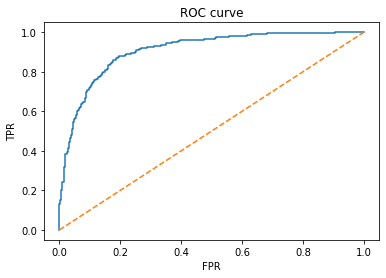

In [23]:
# ROC 커브 그리기

plt.title('ROC curve')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1], ls='--')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

C:\conda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\conda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


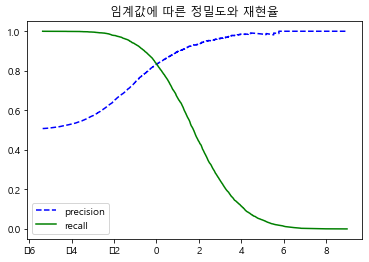

In [25]:
# precision vs recall curve

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve

target = cross_val_predict(logit, features_train, target_train, cv=3,
                          method='decision_function')
precisions, recalls, thresholds = precision_recall_curve(target_train, target)

def precision_vs_recall(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='recall')
    plt.title('임계값에 따른 정밀도와 재현율')
    plt.legend()
    plt.rc('font', family='Malgun Gothic')
precision_vs_recall(precisions, recalls, thresholds)
plt.show()

In [26]:
# ROC 커브 곡선 아래 면적 AUC 구하기

roc_auc_score(target_train, target)

0.9096176821599774

#### Visualizing a Classifier's Performance

In [27]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd

In [29]:
iris = datasets.load_iris()

In [30]:
features = iris.data
target = iris.target
class_names = iris.target_names

In [31]:
features_train, features_test, target_train, target_test = train_test_split(features,
                                                                           target,
                                                                           random_state = 1)

In [32]:
clf = LogisticRegression()

In [34]:
# 모델을 훈련시키고, 테스트 데이터를 예측한다

target_predicted = clf.fit(features_train, target_train).predict(features_test)

C:\conda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
# confusion matrix 만들기

matrix = confusion_matrix(target_test, target_predicted)

In [38]:
# 히트맵으로 표현하기 위해 데이터 프레임 만들기

df = pd.DataFrame(matrix, index=class_names, columns=class_names)

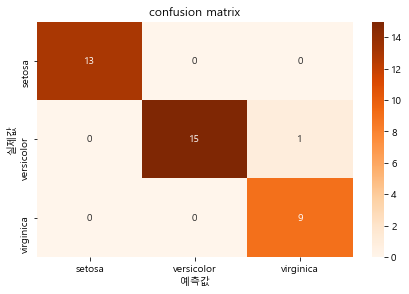

In [41]:
# 히트맥으로 혼동행렬 그리기

sns.heatmap(df, annot=True, cbar=True, cmap='Oranges')
plt.title('confusion matrix')
plt.tight_layout()
plt.ylabel('실제값')
plt.xlabel('예측값')
plt.show()

### Evaluation Regression Models

- MSE(Mean Squared Error): 평균제곱오차, 가장 널리 쓰이는 지표이다. 예측값과 실제값의 차이(오차)의 제곱합을 n으로 나눠준 값이다.
- R^2: 결정계수, 회귀에 의한 변동과 잔차 변동을 이용해 구하며 설명계수라고도 한다. 즉, 회귀모델이 데이터를 얼마나 잘 성명해주고 있는가를 나타내는 지표이다.